## Homework 6

### 1) 
Solving Nonlinear system of Equation.
$$x + y + z = 6$$
$$x^2 + y^2 + z^2 = 14$$
$$x^3 + y^3 + z^3 = 36$$
Recommend: Use $x=1.0, y=0.0, z=-1.0$ as initial guess.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
def u(x,y,z):
    return x + y + z -6
def v(x,y,z):
    return x**2 + y**2 + z**2 - 14
def w(x,y,z):
    return x**3 + y**3 + z**3 - 36

def dux(x,y,z):
    return 1.
def duy(x,y,z):
    return 1.
def duz(x,y,z):
    return 1.

def dvx(x,y,z):
    return 2.*x
def dvy(x,y,z):
    return 2.*y
def dvz(x,y,z):
    return 2.*z

def dwx(x,y,z):
    return 3.*x**2
def dwy(x,y,z):
    return 3.*y**2
def dwz(x,y,z):
    return 3.*z**2

In [3]:
def newton(start,n):
    xi,yi,zi = start
    for i in range(n):
        A= np.array([
            [dux(xi,yi,zi),duy(xi,yi,zi),duz(xi,yi,zi)],
            [dvx(xi,yi,zi),dvy(xi,yi,zi),dvz(xi,yi,zi)],
            [dwx(xi,yi,zi),dwy(xi,yi,zi),dwz(xi,yi,zi)]])
        C= np.array([-u(xi,yi,zi),
                     -v(xi,yi,zi),
                     -w(xi,yi,zi)])
        dx,dy,dz = np.linalg.solve(A,C)
        xi = xi+ dx
        yi = yi+ dy
        zi = zi+ dz
#         print(xi,yi,zi)
    return xi,yi,zi

init_guess = [1.,0.,-1.]
x_ans, y_ans, z_ans = newton(init_guess, 10)

print("The answer is")
print("x =", round(x_ans))
print("y =", round(y_ans))
print("z =", round(z_ans))

The answer is
x = 3
y = 1
z = 2


### 2) 
Let us consider the fruit shop in MUIC canteen. On each day the shop owner needs to figure out how many mangoes to buy on each day.

MUIC has about 4000 students: 2200 female and 1800 male.
The probability that a female student will buy mangoes on a day is about 5% and for male student is 3%.

Each mango costs the shop 8 Baht a piece. The shop sell it for 20 Baht making 12 Baht profit. To make the problem simple we will assume two things.

 1. Mango last only one day which means any left over mango worth 0 Baht at the end of the day.
 2. To make the problem simple let us ignore the fixed cost such as rent and labor.
 3. The shop owner cannot refill mango during the day. If the shop ran out of mango, and next customer comes in. The shop can't make the sale.
 
The shopowner wants to maximize the profit. If the shop owner take the risk by buying a lot he will not be short of mango on a good day, but on a bad day he/she will lose a lot. The shop owner can play safe by buying very few mango so he/she don't lose too much on a bad day, but he/she will miss out a lot of money on a good day.

Your task is to figure out how many mangoes the shop owner should buy.

Hint: Use simulation and make a useful plot.

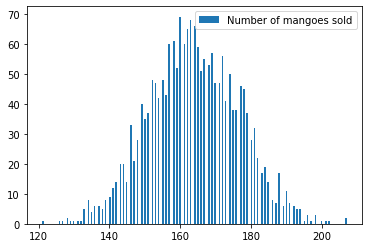

In [4]:
n_men = 1800
n_women = 2200
c_women = 0.05
c_men = 0.03
def buy_fruit(chance=0.05):
    decision = np.random.rand()
    if(decision <= chance):
        return 1
    else:
        return 0
    
def fruit_day_sim_sales():
    sales = 0
    sales = sales + np.sum([buy_fruit(c_men) for i in range(n_men)])
    sales = sales + np.sum([buy_fruit(c_women) for i in range(n_women)])
    return sales

#The point is we want to find the earning on average
def evaluate(mango):
    earned = 0.
    for i in range(30): 
    #We need to consider good and bad days and sum them up to find average
        demand = fruit_day_sim_sales()
        leftover = mango - demand
        if(leftover < 0):
            leftover = 0
        earned = earned+((mango-leftover)*20 - mango*8)
    return earned/30 

def shop_hist_plotter(n=1000):
    data = [fruit_day_sim_sales() for i in range(n)]
    plt.hist(data, bins=200, label='Number of mangoes sold')
    plt.legend()
    return data

data_generated = shop_hist_plotter(2000)

So, the shop owner should see how often that mangoes are sold in 2000 days. On average, mangoes are bought around 160 to 180 mangoes by the kids. The average profit is around 2,000 Baht.

Observation : Minimize the amount of mangos and maximize the profit

The shop owner could buy  177  mangoes. The maximum profit could be  1951.3333333333333  Baht


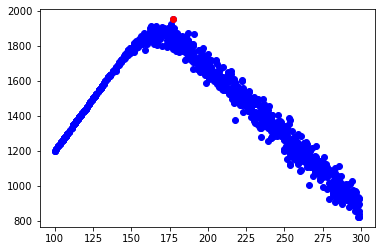

In [5]:
def monte_carlo(n=1000):
    mango = np.random.randint(100,300) 
    max_mango = mango
    max_profit = float('-inf')         
    for i in range(n):
        mango = np.random.randint(100,300)
        earned = evaluate(mango)
        if max_profit < earned:
            max_profit = earned
            max_mango = mango
        plt.plot(mango, earned, 'ob')
    plt.plot(max_mango, max_profit, 'or')
    return max_mango, max_profit

mango, profit = monte_carlo(1000)
print("The shop owner could buy ", mango," mangoes. The maximum profit could be ", profit, " Baht")

### 3)

Let us consider a simplified game of Blackjack. The game is a two-player game: dealer vs player. The goal of the game is get the sum of the card closest to but not over 21.

The cards are counted as follows

1. 2,3,4,5,6,7,8,9 are counted for the number on the card
2. J,Q,K are counted as 10
3. A are counted as either 1 or 11. Whichever one that gets us closer but not over 21.

Here are some example

1. 2, J has the sum of 2+10=12
2. J Q has the sum of 10+10 = 10
3. J A has the sum of 10+11 = 21
4. A 2 J has the sum of 1 + 2 + 10 = 13 (Ace here counts as one since 11 will make the sum over 21)

Here is how the game works:

1. At the beginning each player gets two cards.
2. If one player got 21 with that two cards, that player wins. If both players got 21 with the two cards then it's a draw.
3. The player start first. The player can choose to stop or draw more cards for a chance to improve his/her hand. For this problem we will only consider the algorithm that if the player hand is strictly less than 17 he will draw. If the player has 17 or more, he/will keep drawing until the hand he/she has is 17 or more.
4. If after any draw, the player has more than 21. This is called busted. Once the player is busted the player lose the game immediately.
5. If the player stop drawing, and the dealer will start drawing with the same algorithm explained in 3. That is if the dealer has the sum of less than 17 the dealer will keep drawing until his hand is more than 17.
6. If the dealer is busted, the dealer lose.(Note that if the player is busted, the dealer wins immediately regardless of the result from dealer's draw)
7. If the dealer is not busted, then the sum of player hands and dealer hand are compared. Whoever got the higher number wins.

**Your task**: Suppose we are playing this game with infinite amount of card deck. This means that the next card we draw is independent of the cards that are already out. *Calculate the probability that the player wins*.

In [6]:
def draw():
    i = np.random.randint(13)
    if(i>=10):
        return 10
    else:
        return i

def check_A(hand):
    score = sum(hand)
    optimal_hand = []
    for card in hand:
        if(card==1 and score <= 11):
            optimal_hand.append(11)
            score = score + 10
        elif(card==11 and 21 < score):
            optimal_hand.append(1)
            score = score - 10
        else:
            optimal_hand.append(card)
    return optimal_hand

def blackjack_sim():
    player = check_A([draw(),draw()])
    dealer = check_A([draw(),draw()])
    while(sum(player)<17): #If player's hand is less than 17, continue drawing until 17 or more
        player = check_A(player+[draw()])
        if(sum(player) > 21):
            return 0. 
    while(sum(dealer)<17): #If dealer's hand is less than 17, continue drawing until 17 or more
        dealer = check_A(dealer+[draw()])
        if(sum(dealer) > 21):
            return 1. 
        if sum(dealer) == 21:
            return 0.
    if(sum(player) > sum(dealer)):
        return 1.
    return 0.

In [7]:
def blackjack_sim_n_games(n):
    history = [blackjack_sim() for i in range(n)]
    return np.sum(history)/n
ns = [100,1000,10000, 100000]
for i in ns:
    probability = blackjack_sim_n_games(i)
    print("The probability that the player would win in",i,"games is",probability)
print("\nFor more than 100000 games, the probability is estimated to be > 0.40936")

The probability that the player would win in 100 games is 0.41
The probability that the player would win in 1000 games is 0.418
The probability that the player would win in 10000 games is 0.4156
The probability that the player would win in 100000 games is 0.41083

For more than 100000 games, the probability is estimated to be > 0.40936


# 4) Queue Theory

In this problem we want to study customer queue.

### 4.1) Poisson process.

The poisson process can be defined by time between 2 customer arrival(TBA) of exponential distribution. 
That is the probility density that the TBA of customer $i$ and customer $i+1$ is $t$ is given by

$$
P(t) = \lambda e^{-\lambda t}
$$

This means that we need to be able to generate a random number in exponential distribution.
The easiest way to do this is Inverse CDF(cumulative distribution function). The main idea is to turn a uniform random number from $0-1$ to the desired distribution. Here is how you do it

- Generate a uniform real random number $x$ from 0-1
- We will pretend that it is the number for CDF. That is 
$$
x = \int_0^t P(t') \text{d}t' = 1- e^{- \lambda t}
$$

- Get $t$ from the above relation that is
$$
    t = - \frac{\log(1-x)}{\lambda}
$$

**Your Task**
write the function ***def exp_rand($\lambda$)*** which random number distributed by exponential distribution.


- Optional: figure out why inverse CDF Method works. It has to do with the fact that differentiate of integral is the original function.

If you do it right you should get this. (Notice how the distribution is reduced by a half when $t=\frac{1}{\lambda}$

<img style="width:300px" src="task1.png"/>

In [8]:
def exp_rand(lda): #lambda
    random = np.random.rand()
    return -math.log(1-random)/lda

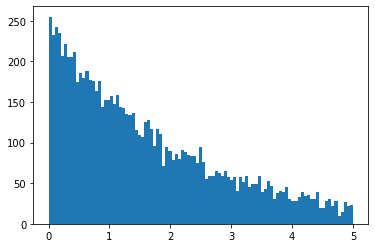

In [9]:
a = [exp_rand(0.5) for i in range(10000)]
plt.hist(a,bins=np.linspace(0,5,100));

### 4.2 Generate 1 Day.

What we want to do in this task is to generate the arrival time of all customers with in a day. This can be done by using the fact that the time between two arrivals is exponentially distributed and make sure that the sum of the time is less than $14$

Given that 1 Store day is 14 hours. 

**Your Task** write a function that generate *arrival times* for all people within a day. If $\lambda$ is $300/14 \frac{person}{hour}$ more on the unit in the next part

Hint: np.cumsum is your friend

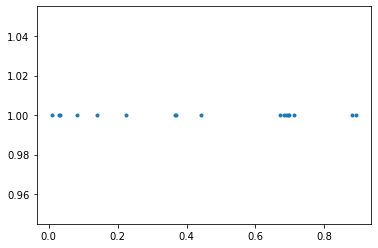

In [10]:
lda2 = 300./14.

def day_gen(hours=14):
    time = 0
    arrivals = []
    while(time < hours):
        arv = exp_rand(lda2)
        arrivals.append(round(arv,5))
        time = time + arv
    if(sum(arrivals)>hours):
        arrivals.pop()
    return np.cumsum(arrivals)

queue = day_gen(1)
xs = [1 for i in range(len(queue))]
plt.plot(queue,xs,".")

### 4.3 

Find the mean of total number who comes into the store in a 14 hour day. You should find that it's exactly $\lambda t$. Hence the unit for $\lambda$

In [11]:
def get_mean_total_visitor(n=100000):
    visitors_sum = 0
    for i in range(n):
        queue = day_gen(14)
        visitors_sum = visitors_sum + len(queue)
    mean= visitors_sum/100000
    return mean

mean = get_mean_total_visitor()
print(mean)
print(mean/14)
print(300/14)

300.0554
21.432528571428573
21.428571428571427


In [12]:
print("The mean of total number who comes into the store in a 14 hour day =",mean)

The mean of total number who comes into the store in a 14 hour day = 300.0554


### 4.4 (This requires a bit of thinking before writing the code)
Let's supposed that there are 2 cashier registers. Each can process customer at the fixed rate of $5 \frac{minute}{person}$. 

Find the average and standard deviation for waiting time for the customer. (This assume that people stand in one sigle long line and go to the next available cashier). (Wait time doesn't include the fixed processing time of 5 minutes).

Recommended Easy Implementation: Generate a Day. Round it up and simulate the processing by minute-ish resolution should be good enough.


I got 0.10275426621160401 hour.

In [15]:
rate = round(5/60,5)
minute = round(1/60,5)

#Nice, now we simulate how system works D:

def is_reg_done(t):
    if(t < rate):
        return 0
    return 1

#I swear, this is harder than i thought
def waiting_time_simulator(p_time=5/60): #Only once!
    time = 0
    times = []
    day_q = day_gen(0.3)
    q_i = 0
    print(day_q)
    reg_1 = 0 #0 is free
    reg_2 = 0 #0 is free
    reg_1_time_done = 0 
    reg_2_time_done = 0 
    free_reg = 2
    terminate = 0 #When to stop assigning job
    total_people = len(day_q)
    wait_time = 0
    wait_records = []
    w_i = 0
    while(q_i < total_people and terminate == 0):
        #free register
        if(time >= reg_1_time_done and reg_1 == 1):
            reg_1 = 0
            free_reg = free_reg +1
            print("reg_1 freed")

        if(time >= reg_2_time_done and reg_2 == 1):
            reg_2 = 0
            free_reg = free_reg +1
            print("reg_2 freed")

        while(free_reg > 0 and q_i < total_people and terminate == 0): 
        #While there are free register, assign job
        #FIFO - queue - service when the customer arrive at that minute
            if time < day_q[q_i]:
                break
            if(reg_1 == 0): 
                print("reg_1 used", q_i)
                #Take first register and calculate when the register is free again
                #Then prepare to service next visitor
                reg_1 = 1 
                free_reg = free_reg - 1
                reg_1_time_done = time + p_time
                q_i = q_i +1
                if(q_i == total_people):
                    terminate = 1
                else:
                    print("Next customer ",day_q[q_i])
                continue
            if(reg_2 == 0):
                print("reg_2 used",q_i)
                #Take second register and calculate when the register is free again
                #Then prepare to service next visitor
                reg_2 = 1 
                free_reg = free_reg - 1
                reg_2_time_done = time + p_time
                q_i = q_i +1
                if(q_i == total_people):
                    terminate = 1
                else:
                    print("Next customer ",day_q[q_i])

        #Time to wait, if there are upcoming customers today but not taking services
        #NOT DONE
        if(terminate == 0):
            if(wait_time > 0 and w_i != q_i):
                print("Resetting", wait_time)
                wait_time = 0
            if(time >= day_q[q_i]):
                wait_records.append(wait_time)
                wait_time = wait_time + minute
                w_i = q_i
                print("Waiting time =", wait_time)
        time = time + minute
        print(time)
        
    print("\n", wait_records)
    return wait_records

In [16]:
wait_times = np.array(waiting_time_simulator(rate))

if len(wait_times) > 0:
    print("Average waiting time:", np.average(wait_times))
    print("Standard deviation for waiting time:", np.std(wait_times))

[0.03594 0.04631 0.07349 0.08185 0.15559 0.22256 0.25598]
0.01667
0.03334
0.05001
reg_1 used 0
Next customer  0.046310000000000004
reg_2 used 1
Next customer  0.07349
0.06668
0.08335000000000001
Waiting time = 0.01667
0.10002000000000001
Waiting time = 0.03334
0.11669000000000002
Waiting time = 0.05001
0.13336
reg_1 freed
reg_2 freed
reg_1 used 2
Next customer  0.08185
reg_2 used 3
Next customer  0.15559
Resetting 0.05001
0.15003
0.1667
Waiting time = 0.01667
0.18336999999999998
Waiting time = 0.03334
0.20003999999999997
Waiting time = 0.05001
0.21670999999999996
reg_1 freed
reg_2 freed
reg_1 used 4
Next customer  0.22256
Resetting 0.05001
0.23337999999999995
reg_2 used 5
Next customer  0.25598
0.25004999999999994
0.26671999999999996
Waiting time = 0.01667
0.28339
Waiting time = 0.03334
0.30006
reg_1 freed
reg_1 used 6
0.31673

 [0, 0.01667, 0.03334, 0, 0.01667, 0.03334, 0, 0.01667]
Average waiting time: 0.01458625
Standard deviation for waiting time: 0.013013014579162662
